This is the Training Stage Implementation of [Spoonful Bangkit 2024 Casptone Project](https://github.com/Spoonful-Capstone/Spoonful-ML/tree/master). Go to [this link](https://colab.research.google.com/drive/1PNFcuP_6eNZCoIU2s4ZEzqBfs1wv77t-?usp=sharing#scrollTo=Ozov7ku6H4AN) if you want to open it on colab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title <p> Import kaggle API
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download 'anasfikrihanif/indonesian-food-and-drink-nutrition-dataset'


Dataset URL: https://www.kaggle.com/datasets/anasfikrihanif/indonesian-food-and-drink-nutrition-dataset
License(s): CC0-1.0
  0% 0.00/73.7k [00:00<?, ?B/s]
100% 73.7k/73.7k [00:00<00:00, 65.2MB/s]


In [ ]:
!unzip -q '/content/indonesian-food-and-drink-nutrition-dataset.zip'
!rm '/content/indonesian-food-and-drink-nutrition-dataset.zip'

In [ ]:
df = pd.read_csv('nutrition.csv')

In [ ]:
df.head()

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
 6   image         1346 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


<Axes: >

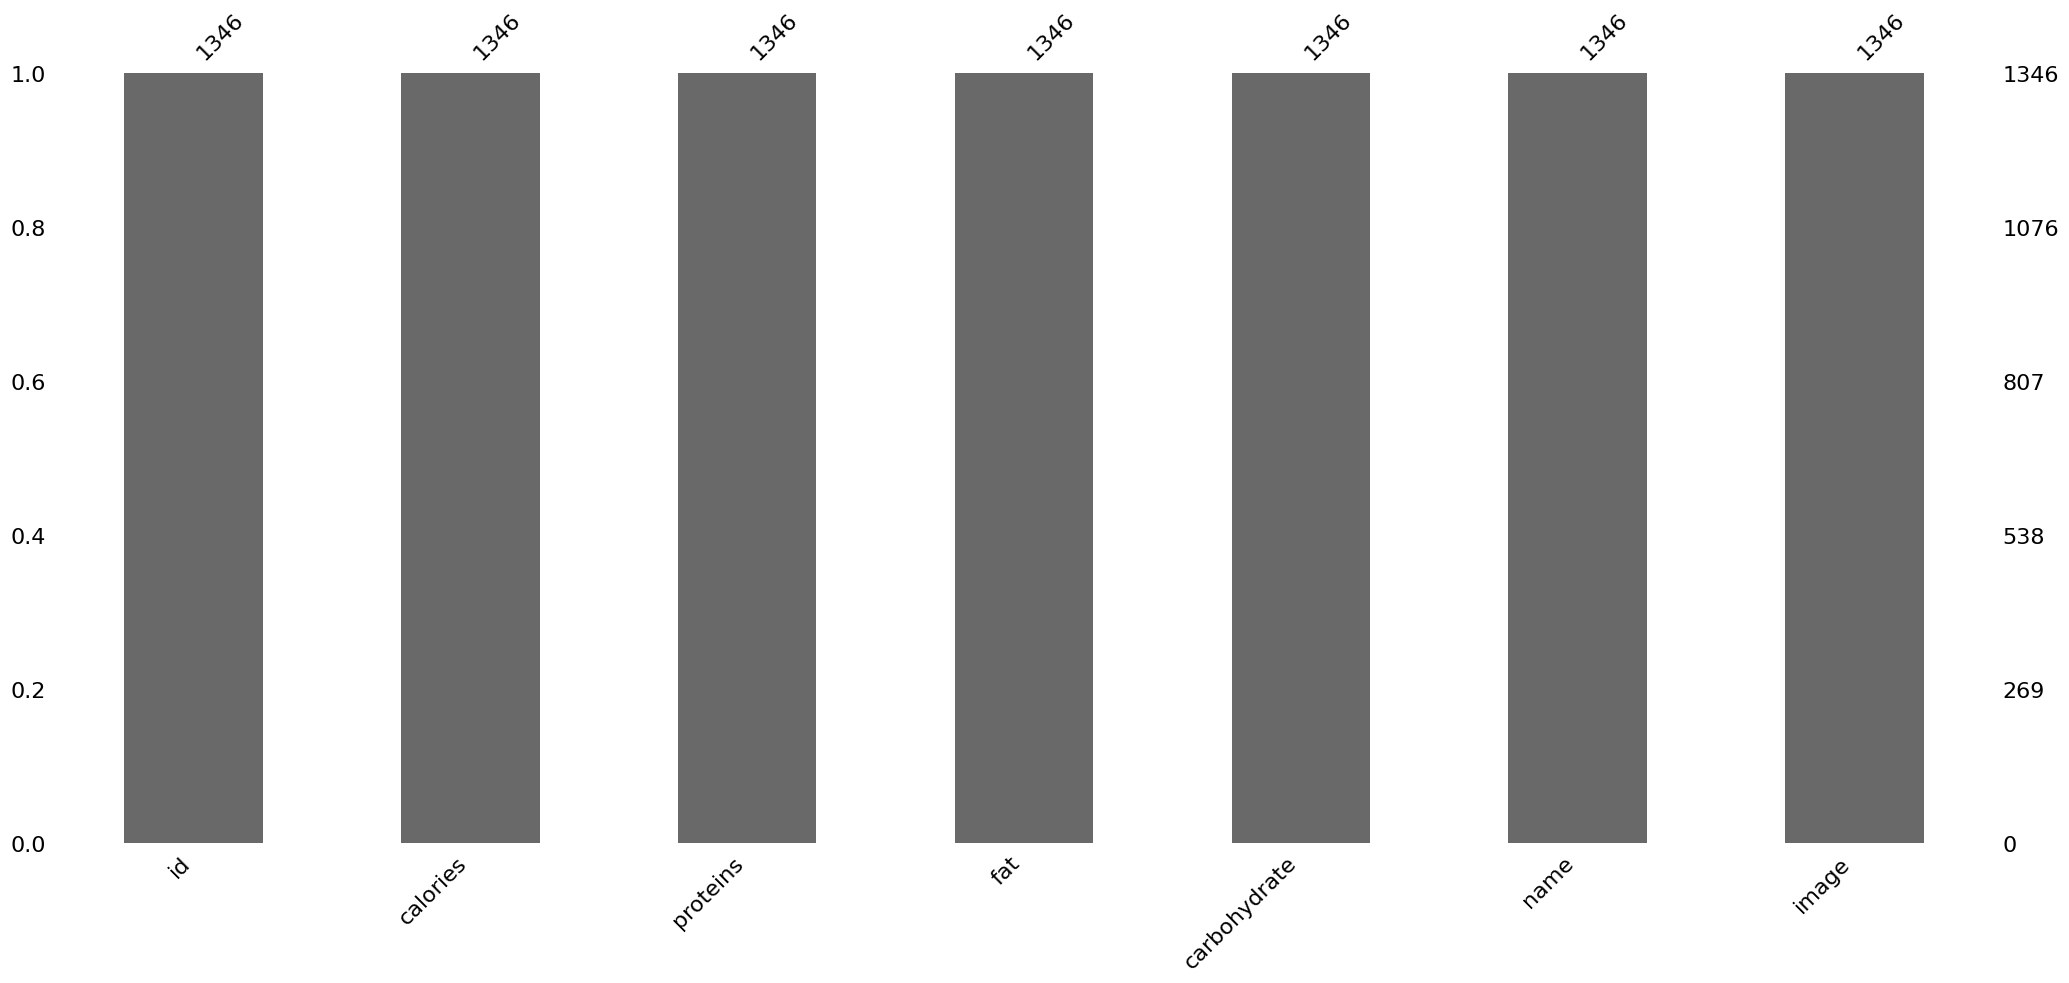

In [ ]:
msno.bar(df)

In [ ]:
df.describe()

,id,calories,proteins,fat,carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,673.500000,203.217385,10.001189,7.584027,25.390193
std,388.701042,163.075430,11.847980,13.733063,32.193054
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,337.250000,75.000000,1.800000,0.500000,4.525000
50%,673.500000,146.000000,5.000000,2.000000,13.300000
75%,1009.750000,333.750000,15.000000,8.275000,37.575000
max,1346.000000,940.000000,83.000000,100.000000,647.000000


In [ ]:
duplicate_df = df.duplicated().sum()

In [ ]:
print("duplicated: ", duplicate_df)

duplicated:  0


# EXPLORATORY DATA ANALYSIS

In [ ]:
df = df.drop(['id', 'image'], axis=1)

In [ ]:
df.columns = df.columns.str.replace('-', ' ').str.title()

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,Calories,Proteins,Fat,Carbohydrate,Name
0,280.0,9.2,28.4,0.0,Abon
1,513.0,23.7,37.0,21.3,Abon haruwan
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar


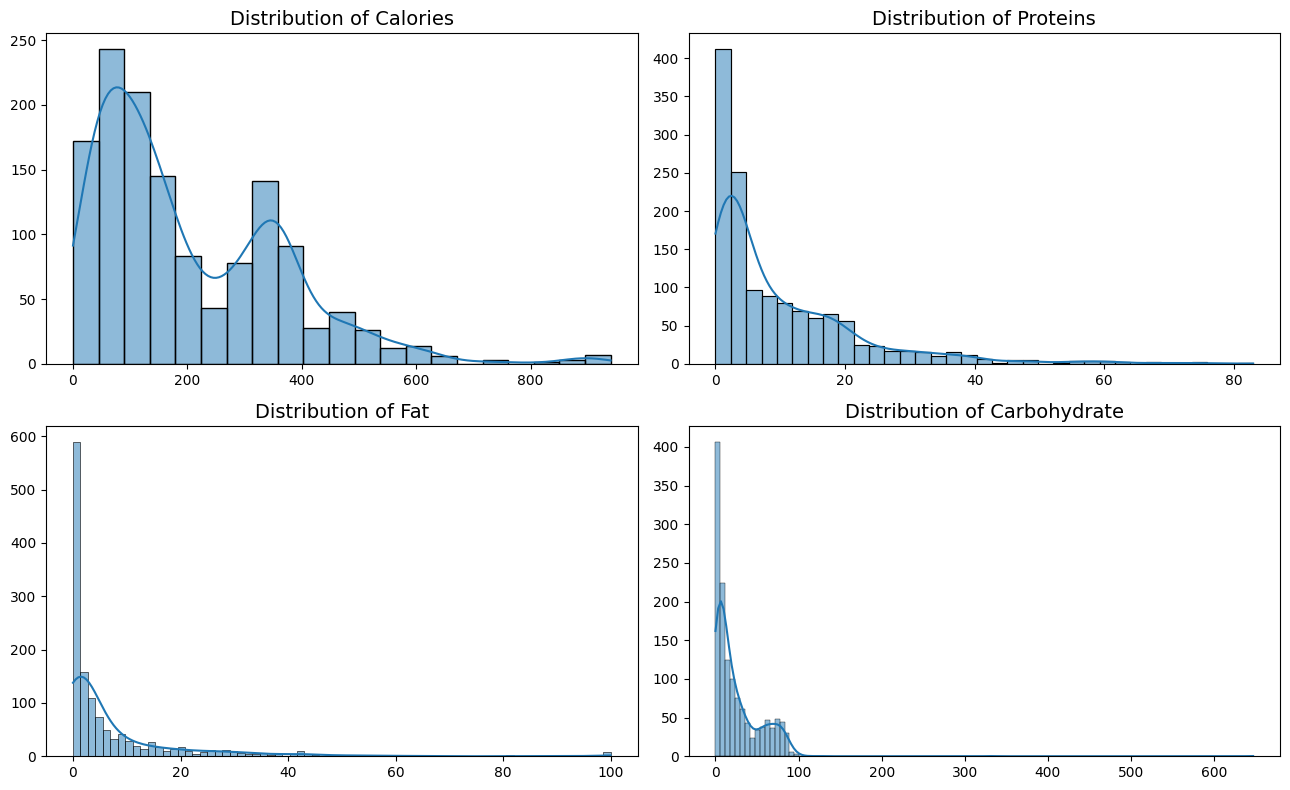

In [ ]:
features = ['Calories', 'Proteins', 'Fat', 'Carbohydrate']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
axes = axes.ravel()
for i, col in enumerate(features):
    sns.histplot(df1[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()

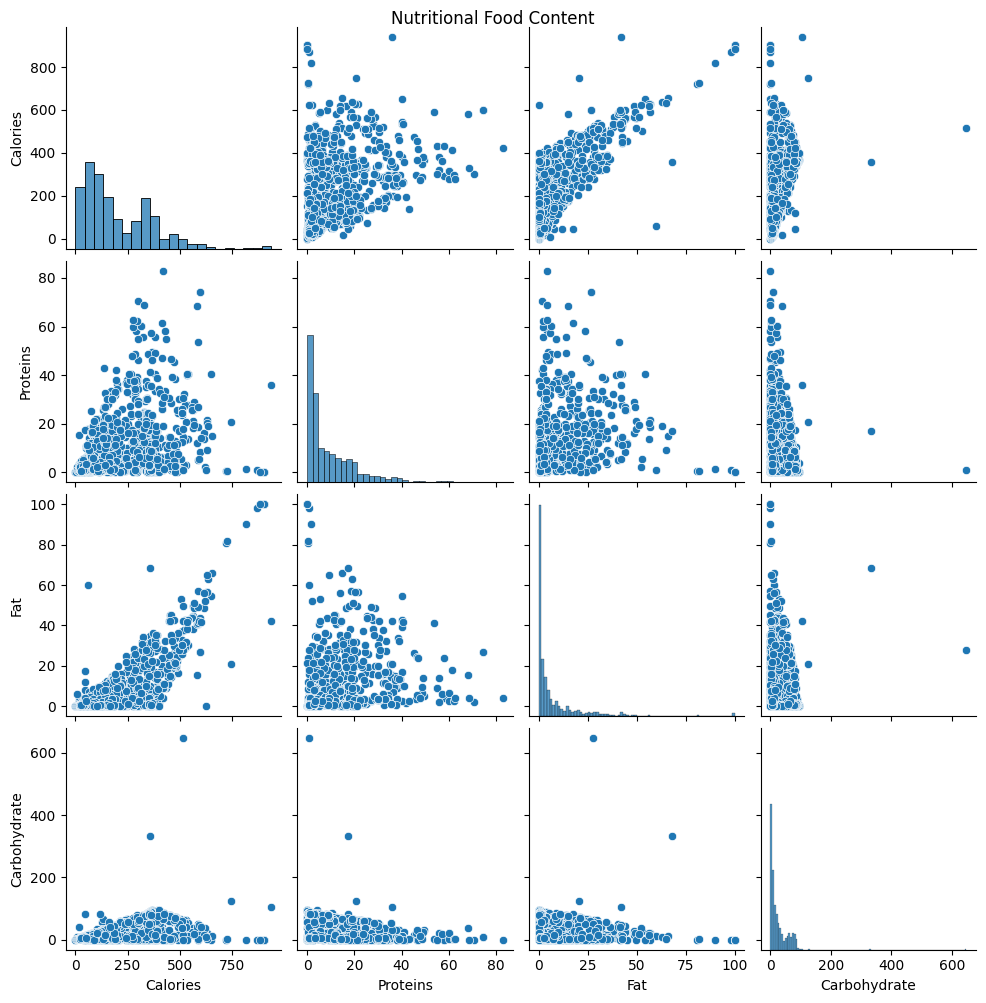

In [ ]:
multivariate_df = df1[['Calories', 'Proteins', 'Fat', 'Carbohydrate']]

sns.pairplot(multivariate_df)
plt.suptitle('Nutritional Food Content', y=1.00)
plt.show()

Handle Outlier

0 Calories
1 Proteins
2 Fat
3 Carbohydrate


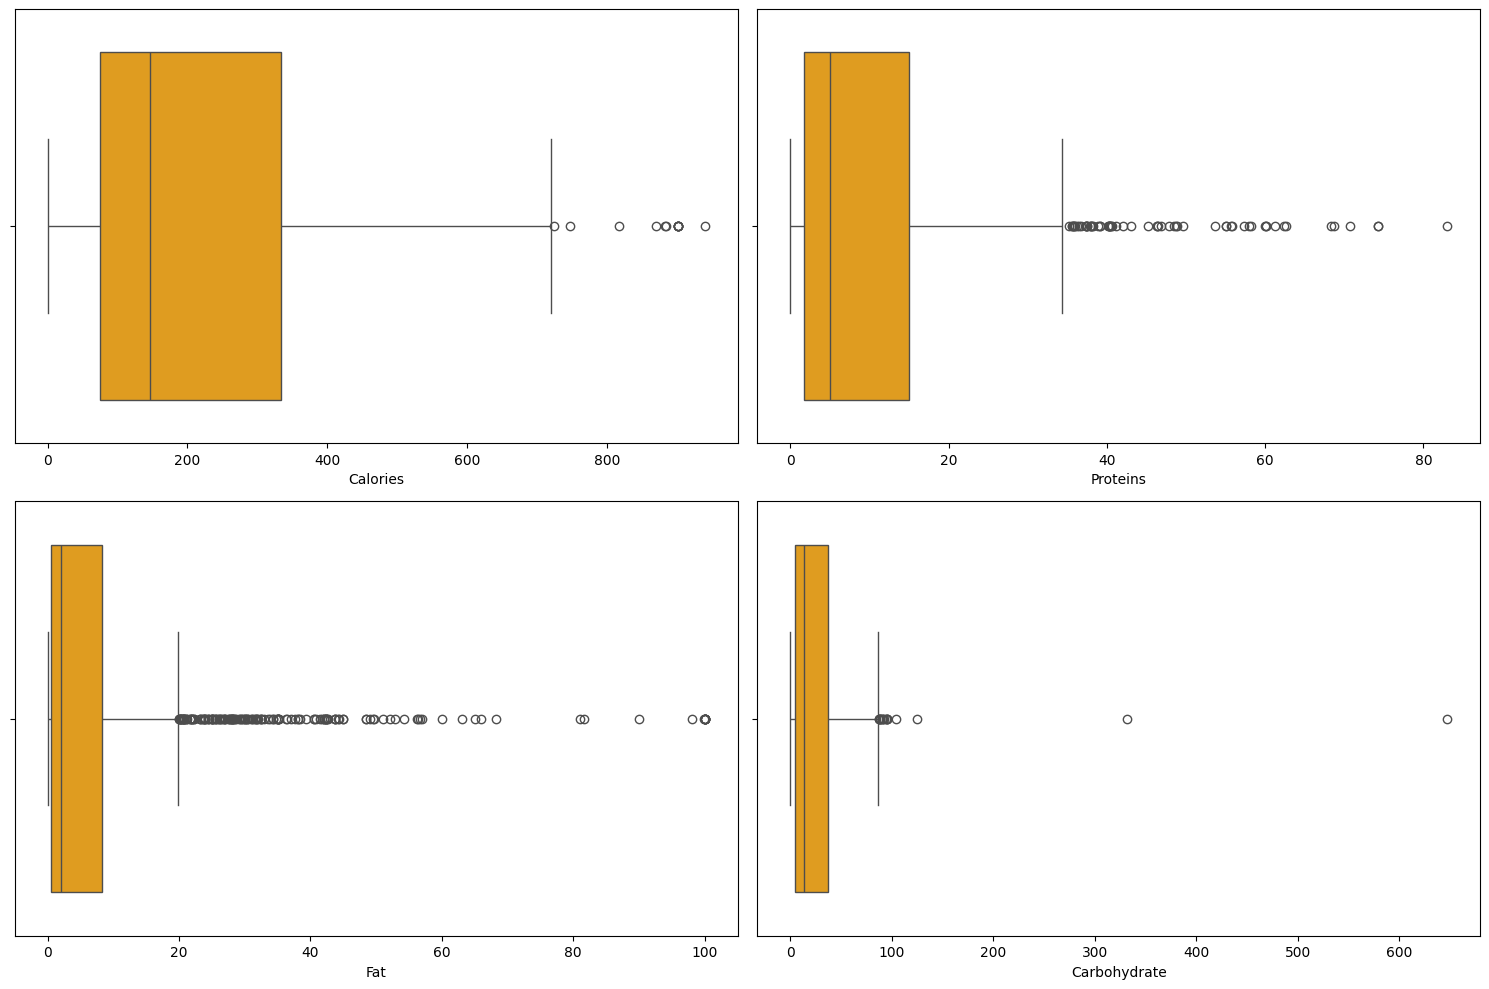

In [ ]:
col = ['Calories', 'Proteins', 'Fat', 'Carbohydrate']
# plt.figure(figsize=(15,10))
# for i,v in enumerate(col):
#   print(i, v)
#   plt.subplot(3,2,i+1)
#   sns.boxplot(x=v, data=df1, color='orange')

def box_plots(df, cols, figsize=(15,10), color='orange'):
  plt.figure(figsize=(15,10))
  for i,v in enumerate(cols):
    print(i, v)
    plt.subplot((len(cols) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df[v], color=color)
  plt.tight_layout()
  plt.show()

box_plots(df1, col)


In [ ]:
def remove_outliers_iqr(df1, columns):
  for column in columns:
      Q1 = df1[column].quantile(0.25)
      Q3 = df1[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
  return df1

df1 = remove_outliers_iqr(df1, ['Calories', 'Proteins', 'Fat', 'Carbohydrate'])

0 Calories
1 Proteins
2 Fat
3 Carbohydrate


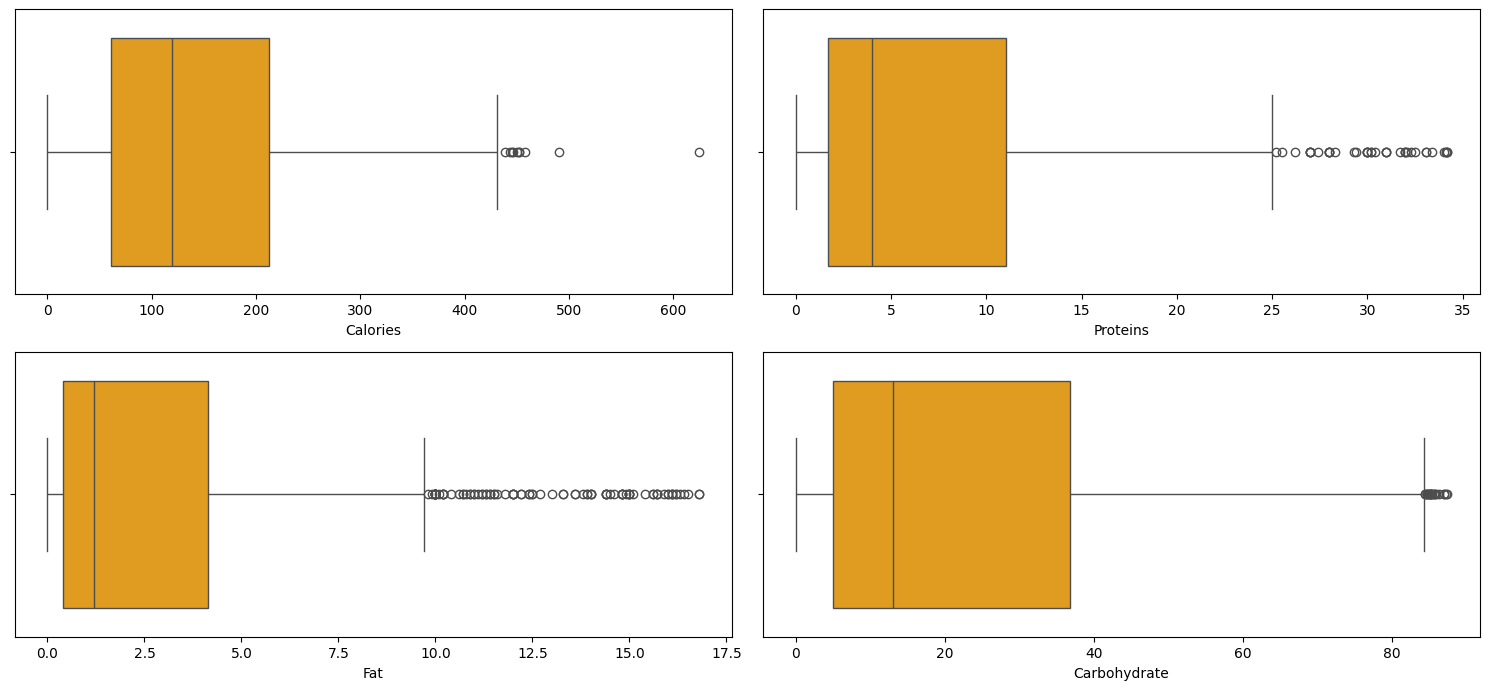

In [ ]:
def box_plots(df, cols, figsize=(15,10), color='orange'):
  plt.figure(figsize=figsize)
  for i,v in enumerate(cols):
    print(i, v)
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[v], color=color)
  plt.tight_layout()
  plt.show()

box_plots(df1, col)

In [ ]:
df1.rename(columns = ({'label': 'Name'}), inplace = True)

In [ ]:
cat_col = []
num_col = []

for col in df1.columns:
  if df1[col].dtype =='object':
    cat_col.append(col)
  else:
    num_col.append(col)
print("Categorical column : ", cat_col)
print("Numberical columns : ", num_col)

Categorical column :  ['Name']
Numberical columns :  ['Calories', 'Proteins', 'Fat', 'Carbohydrate']


In [ ]:
encoder = LabelEncoder()

for col in cat_col:
    df1[col] = encoder.fit_transform(df1[col])


scale = MinMaxScaler()

for col in num_col:
    df1[[col]] = scale.fit_transform(df1[[col]])

In [ ]:
df1.head()

,Calories,Proteins,Fat,Carbohydrate,Name
2,0.0000,0.000000,0.011905,0.000000,0
3,0.0720,0.032164,0.023810,0.123570,1
4,0.0592,0.128655,0.029762,0.043478,2
5,0.1360,0.026316,0.386905,0.088101,3
6,0.1536,0.108187,0.035714,0.218535,4


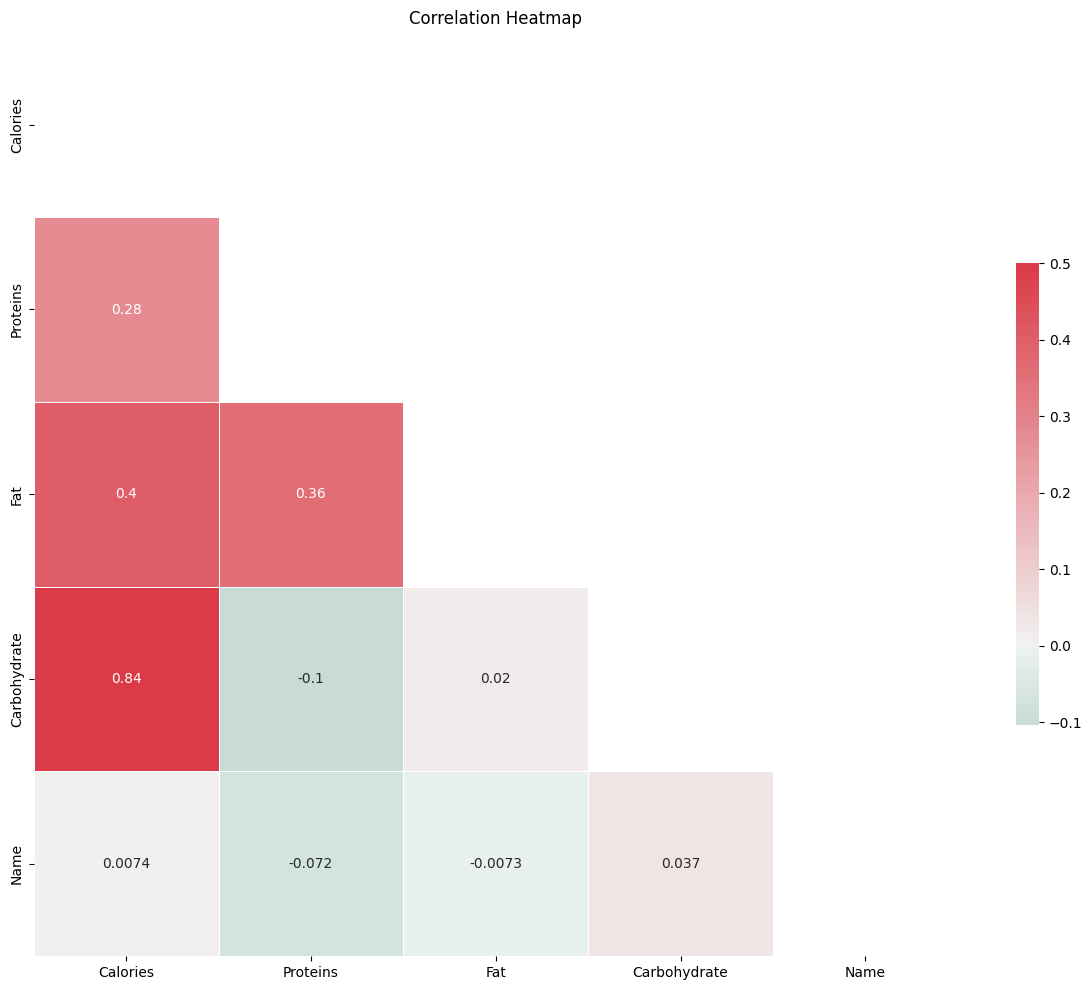

In [ ]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(160, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

# MODELING

In [ ]:
df2 = df1.copy()


df2 = df2.drop(['Name'], axis=1)


X = df2.drop('Calories', axis=1)
y = df2['Calories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # actual vs predicted values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Calories')
    plt.ylabel('Predicted Calories')
    plt.title(f'Actual vs Predicted Calories - {type(model).__name__}')
    plt.show()

    return mse, r2

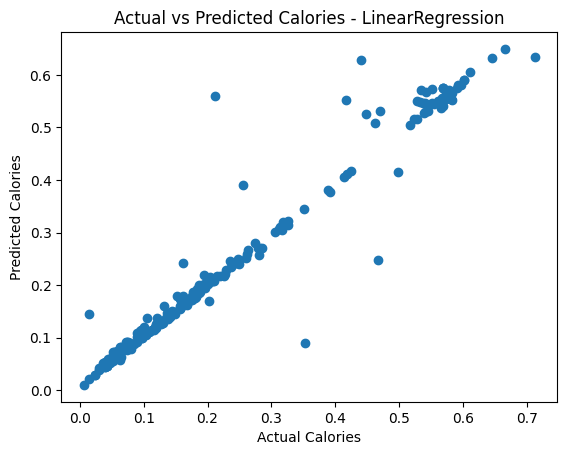

In [ ]:
results = {}

results['Linear Regression'] = evaluate_model(model, X_test_scaled, y_test)

In [ ]:
best_model = min(results, key=results.get)

print(f'Best Model: {best_model}')
print(f'Mean Squared Error: {results[best_model][0]}')
print(f'R-squared: {results[best_model][1]}')

Best Model: Linear Regression
Mean Squared Error: 0.0017548717524214332
R-squared: 0.9506375012919601
